In [1]:
library('sandwich')

In [23]:
x <- seq(5,500)

bh1 <- bh2 <- se1 <- se2 <- se3 <- c()

for (i in 1:1000){
    e <- x*rnorm(length(x), 0, 1)
    y <- 10 + 2 * x + e
    
    m1 <- summary(lm(y~x))
    m2 <- summary(lm(y~x, weights = 1/x))

    bh1 <- c(bh1, m1$coefficients[2,1])
    bh2 <- c(bh2, m2$coefficients[2,1])
    se1 <- c(se1, m1$coefficients[2,2])
    se2 <- c(se2, m2$coefficients[2,2])
    se3 <- c(se3, sqrt(vcovHC(lm(y~x), type='HC0')[2,2]))
    
} 

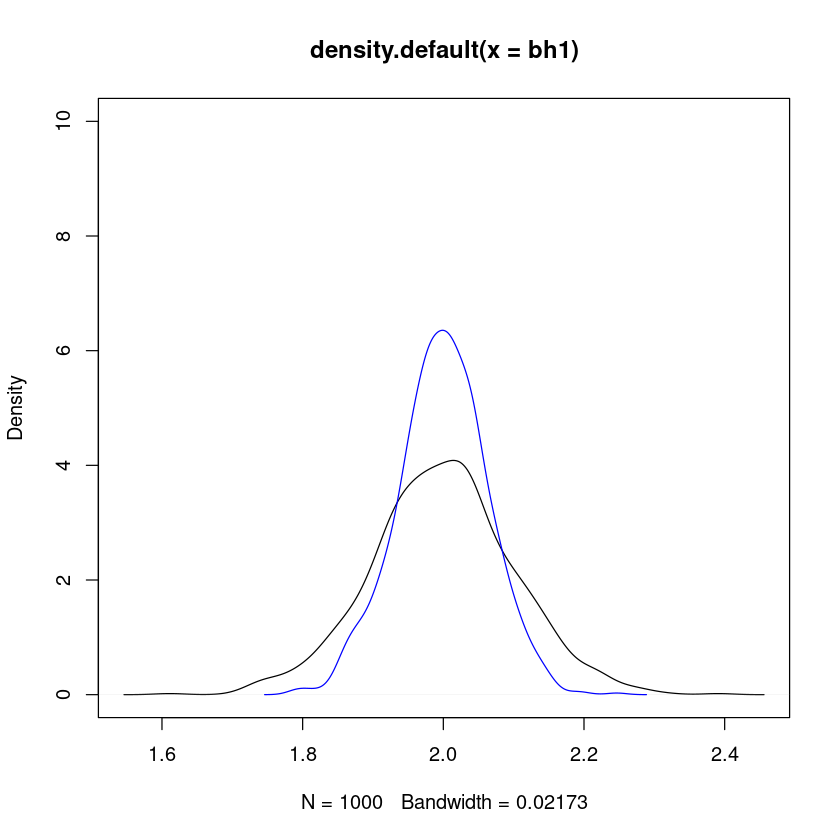

In [24]:
plot(density(bh1), ylim=c(0,10))
lines(density(bh2), col='blue')

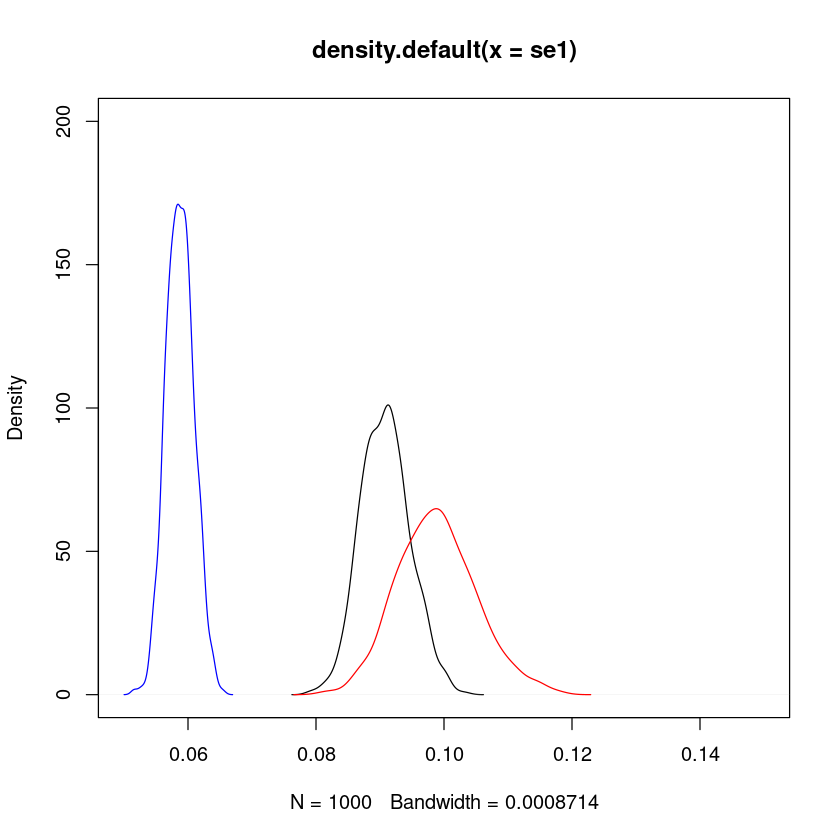

In [25]:
plot(density(se1), ylim=c(0,200), xlim=c(0.05, 0.15))
lines(density(se2), col='blue')
lines(density(se3), col='red')

In [26]:
sd(bh1)
mean(se1)
mean(se3)

[1] 0.1012572

[1] 0.0908453

[1] 0.09887085

In [27]:
sd(bh2)
mean(se2)

[1] 0.06365455

[1] 0.05874927